<img src="https://www.ikiam.edu.ec/img/logo-ikiam-grey.png" width=300 height=240 />

# EXAMEN PARCIAL PYTHON
    

## GBI6-2021II: BIOINFORMÁTICA

**Canguan, Jomely** <--- CAMBIE POR LOS QUE CORRESPONDA A SUS DATOS

**18-02-2021**

<font color='red'>NO AGREGUE NUEVAS CELDAS, UTILICE ÚNICAMENTE LAS QUE ESTÁN CREADAS</font>


### REQUERIMIENTOS PARA EL EXAMEN
Para este examen se requiere dos documentos: 

1. Archivo ```miningscience.py``` donde tendrá dos funciones:

2. Archivo ```2021II_GBI6_ExamenParcialPython``` donde se llamará las funciones y se obtendrá resultados.

## Ejercicio 1 [2 puntos]
Cree el archivo ```miningscience.py``` con las siguientes dosfunciones:
    
i. ```download_pubmed```: para descargar la data de PubMed utilizando el **ENTREZ** de Biopython. El parámetro de entrada para la función es el ```keyword```. 
    
ii. ```mining_pubs```: esta función debe utilizar el módulo **re** y utilizar el párametro ```tipo``` para realizar lo siguiente:
        
* Si el tipo es "DP" recupera el año de publicación del artículo. El retorno es un *dataframe* con el **PMID** y el **DP_year**.
      
* Si el tipo es "AU" recupera el número de autores por **PMID**. El retorno es un *dataframe* con el **PMID** y el **num_auth**. 
      
* Si el tipo es "AD" recupera el conteo de autores por país. El retorno es un *dataframe* con el **country** y el **num_auth**. 

* *Puede utilizar un ```if``` dentro de la función.* 

* *Cree un docstring para cada función.* 

Luego de crear las funciones, cargue el módulo ```miningscience``` como ```msc``` e imprima docstring de cada función.




In [16]:
## 
def download_pubmed (keyword):
    """
   Funcion que pide como entrada una variable tipo string y como salida muestra un DataFrame 
    """
    from Bio import Entrez
    from Bio import SeqIO
    from Bio import GenBank 
    Entrez.email = 'jomely.cunguan@est.ikiam.edu.ec'
    handle = Entrez.esearch(db='pubmed',
                        sort='relevance',
                        retmax='1000',
                        retmode='xml',
                        term=keyword)
    results = Entrez.read(handle)
    id_list = results["IdList"]
    ids = ','.join(id_list)
#id_l.append(ids)
    Entrez.email = 'jomely.cunguan@est.ikiam.edu.ec'
    handle = Entrez.efetch(db='pubmed',
                       retmode='xml',
                       id=ids)
    id_l = ids.split(",")
    return (id_l) 


##mining_pubs 
import csv 
import re
import pandas as pd 
from collections import Counter

def mining_pubs(tipo):
    """
    función que pide como entrada una variable tipo string que puede ser "DP", "AU y "AD" y en output muestra un DataFrame 
    de PMID y año de publicación; PMID y pais y numero de autores respectivamente;
    """
    with open("pubmed-EcuadorGen-set.txt", errors="ignore") as f: 
        texto = f.read() 
    if tipo == "DP":
        ## Data frame con el PMID y año de publicación
        PMID = re.findall("PMID- (\d*)", texto) 
        year = re.findall("DP\s{2}-\s(\d{4})", texto) ##extrae el año de publicación de los articulos 
        pmid_year = pd.DataFrame()
        pmid_year["PMID"] = PMID
        pmid_year["Año de publicación"] = year
        return print(pmid_year)
    ## Data frame con el PMID y año de publicación 
    elif tipo == "AU": 
        PMID = re.findall("PMID- (\d*)", texto) 
        autores = texto.split("PMID- ")
        autores.pop(0)
        num_autores = []
        for i in range(len(autores)):
            numero = re.findall("AU -", autores[i])
            n = (len(numero))
            num_autores.append(n)
        pmid_autor = pd.DataFrame()
        pmid_autor["PMID"] = PMID 
        pmid_autor["Numero de autores"] = num_autores
        return print(pmid_autor)
    elif tipo == "AD": 
        texto = re.sub(r" [A-Z]{1}\.","", texto)
        AD = texto.split("AD  - ")
        n_paises = []
        for i in range(len(AD)): 
            pais = re.findall("\S, ([A-Za-z]*)\.", AD[i])
            if not pais == []: 
                if not len(pais) >= 2: 
                    if re.findall("^[A-Z]", pais[0]): ## se elimina aquellas selecciones que no empiezan con mayusculas
                        n_paises.append(pais[0])
        conteo=Counter(n_paises)
        resultado = {}
        for clave in conteo:
            valor = conteo[clave]
            if valor != 1: 
                resultado[clave] = valor 
        numero_pais = pd.DataFrame()
        numero_pais["pais"] = resultado.keys()
        numero_pais["numero de autores"] = resultado.values()
        return print(veces_pais)
import miningscience as msc 

help(download_pubmed)
help(mining_pubs)
#help(download_pubmed)
#help(mining_pubs)

Help on function download_pubmed in module __main__:

download_pubmed(keyword)
    Funcion que pide como entrada una variable tipo string y como salida muestra un DataFrame

Help on function mining_pubs in module __main__:

mining_pubs(tipo)
    función que pide como entrada una variable tipo string que puede ser "DP", "AU y "AD" y en output muestra un DataFrame 
    de PMID y año de publicación; PMID y pais y numero de autores respectivamente;




## Ejercicio 2 [1 punto]


Utilice la función ```download_pubmed``` para descargar la data con el keyword ```Ecuador proteomics``` e imprima lo siguiente: 

```python
'El número de artículos es: xx' # xx corresponde al número de artículos recuperados

'El PMID del primer artículo es: xxxxxxxx' # xxxxxxxx corresponde al ID del artículo en PUDMED

```

In [17]:
info = download_pubmed("Ecuador Genomics")

print ("El numero de articulos es:", len(info)) 

print ("El PMID del primer articulo es:", info[0])




El numero de articulos es: 193
El PMID del primer articulo es: 31822297


## Ejercicio 3 [1 punto]

Utilice la función ```mining_pubs``` para crear los siguientes dataframes: 

* pub_year

* pub_authors

* coutries

Muestre los dos primeros y los dos últimos registros de cada dataframe. 

In [20]:
import miningscience as msc
pubyear = msc.mining_pubs("DP")
print (n_year.iloc[0:2])
print (n_year.iloc[826:])
pub_authors = msc.mining_pubs("AU")
print (authors.iloc[0:2])
print (authors.iloc[826:])
countries = msc.mining_pubs("AD")
print (countries.iloc[0:2])
print (countries.iloc[112:])

       PMID Año de publicación
0  19844075               2010
1  31822297               2019
         PMID Año de publicación
826  27429642               2016
827  31891233               2020
       PMID  Numero de autores
0  19844075                  2
1  31822297                  3
         PMID  Numero de autores
826  27429642                173
827  31891233                728
      pais  numero de autores
0  Ecuador               1206
1  Belgium                 90
        pais  numero de autores
112  Vietnam                  3
113    Korea                  2


## Ejercicio 4 [2 puntos]

Realice la visualización de los datos del ejercicio 3. 

* ```pubyear```: utilizando el conteo artículos por año, calcule la media y la desviación estandar (asumiendo que la distribución es normal). Realice un gráfico de la distribución normal de sus datos. Coloque el título, leyenda de los ejes "x" e "y", y la leyenda de la curva (utilice las expresiones matemáticas tipos latex de ser necesario). 

* ```pub_authors```: realice un boxplot del conteo de autores por artículo. Coloque las leyendas adecuadas para cada eje y el título.  

* ```countries```: realice una nube de puntos (adaptación de su tarea), resalte al menos 3 países con flechas. Coloque las leyendas adecuadas para cada eje y el título. 


La media es:  2014.87077294686
La desviación estandar es:  6.804327940706886


Text(0, 0.5, 'Frecuencia')

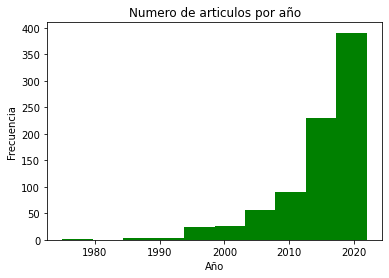

In [22]:
import pandas as pd 
import matplotlib.pyplot as plot
from collections import Counter
pubyear["Año de publicación"] = pubyear["Año de publicación"].astype("int")
mean_py = pubyear["Año de publicación"].mean()
sd_py = pubyear["Año de publicación"].std()
print ("La media es: ", mean_py)
print ("La desviación estandar es: ", sd_py)
#print (pub_year["Año de publicación"])
intervalos = range(min(pubyear["Año de publicación"]), max(pubyear["Año de publicación"]))
plot.hist(x=pubyear["Año de publicación"], color = "green")
plot.title("Numero de articulos por año")
plot.xlabel("Año")
plot.ylabel("Frecuencia")

Text(0, 0.5, 'Frecuencia')

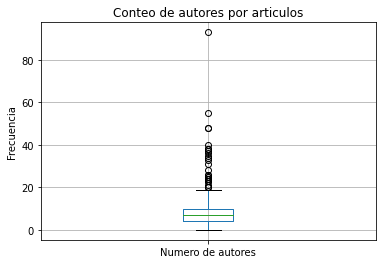

In [23]:
pub_authors 
boxplot = pub_authors[0:700].boxplot(column=["Numero de autores"])
plot.title("Conteo de autores por articulos")
plot.ylabel("Frecuencia")

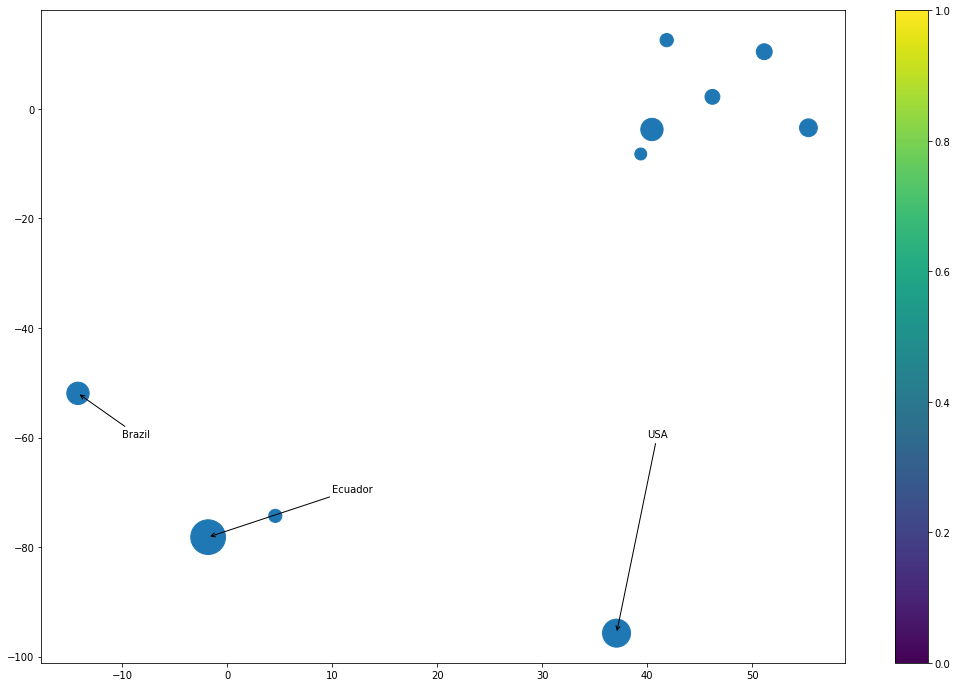

In [27]:
countries = countries.sort_values("numero de autores")
max_pais = (countries[104:])

countries_lat = [39.399872, 4.570868, 41.87194, 46.227638, 51.165691, 55.378051, 
                40.463667, -14.235004, 37.09024, -1.831239  ] 
                 
countries_long = [-8.224454, -74.297333, 12.56738, 2.213749, 10.451526, -3.435973,  
                 -3.74922, -51.92528, -95.712891, -78.183406]
repeticiones = [143, 173, 177, 221, 253, 316, 499, 501, 784, 1206]

import matplotlib.pyplot as plot
%matplotlib inline

plot.scatter(countries_lat, countries_long, repeticiones) 
plot.colorbar()
ard = dict(arrowstyle="->")
plot.annotate("Ecuador", xy = (-1.831239, -78.183406 ), 
             xytext = (10,-70), arrowprops = ard) 
plot.annotate("USA", xy= (37.09024, -95.712891), 
            xytext = (40, -60), arrowprops = ard)
plot.annotate("Brazil", xy= (-14.235004, -51.92528), 
            xytext = (-10, -60), arrowprops = ard)
params = plot.gcf()
plSize = params.get_size_inches()
params.set_size_inches( (plSize[0] * 3, plSize[1] * 3) )
plot.show()

## Ejercicio 5 [1 punto]

#### En el histograma se puede observar que ha existido un aumento en el numero de articulos desde el año 1975 hasta la actualidad respecto a la busqueda "Ecuador Genomics" 

#### En el diagrama de cajas se puede observar que la media de autores por articulos es cercana a 10 y existen varios articulos que superan el limite superior 

#### Ecuador fue el pais que mas frecuencia tuvo en la nacionalidad de autores seguido por USA y Brasil respectivamente. En el diagrama de puntos se observa a los 10 paises que mas se repetieron 

### Escriba la respuesta del ejercicio 5


## Ejercicio 6 [2 puntos]

Para algún gen de interés, realice lo siguiente: 

1. Una búsqueda en la página del [NCBI nucleotide](https://www.ncbi.nlm.nih.gov/nucleotide/).

2. Descargue el ```Accession List``` de su búsqueda.

3. Cargue el ```Accession List``` en este notebook y haga una descarga de la data tipo ```genbank``` utilizando los diez primeros IDs de accesión. 

4. Arme un árbol filogenético para los resultados del paso 3.

5. Interprete el árbol del paso 4. 

In [37]:
from Bio import Phylo
from Bio import SeqIO
from Bio import AlignIO
from Bio.Phylo.TreeConstruction import DistanceCalculator
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor
from Bio import Entrez
from Bio import SeqIO
from Bio import GenBank 
import csv 
import re 

##gen BRCA1 
with open("sequence.seq", errors="ignore") as file: 
    archivo = file.read()
acceso = archivo.split("\n")
Entrez.email="jomely.cunguan@est.ikiam.edu.ec"
inf = open("depuracion.txt", "w")
for i in acceso[0:10]: 
    handle=Entrez.efetch(db="nuccore", id=i, rettype="fasta")
    inf.write(handle.read())
with open("align.txt", "r") as f: 
    align = AlignIO.read(f, "clustal")
calculator = DistanceCalculator("identity")
distance_matriz = calculator.get_distance(align)
constructor = DistanceTreeConstructor(calculator)
tree = constructor.build_tree(align)
tree.rooted = True 
Phylo.draw_ascii(tree)

     __________ MF945601.1
    |
   _| MF945604.1
  | |
 ,| | MF945605.1
 ||
 ||          ___ MF945603.1
 ||_________|
 |          |       ______________________________________________ KT120061.1
 |          |______|
 |                 |___________________________________________ AF159258.1
 |
 | MF945606.1
 |
_| MF945608.1
 |
 | MF945607.1
 |
 | MF945602.1



#### En el arbol filogenetico se puede observar 9 clados y en el caso de las secuencias  MF945606.1, MF945608.1, MF945607.1 y MF945602.1 son las que presentan mayor semejanza debido a que pertenecen al gen BRCA1 de la misma especie 

## Ejercicio 7 [1 punto]


1. Cree en GitHub un repositorio de nombre ```GBI6_ExamenPython```. 
2. Cree un archivo ```Readme.md``` que debe tener lo siguiente: 
- Datos personales
- Características del computador
- Versión de Python/Anaconda y de cada uno de los módulos/paquetes y utilizados
- Explicación de la data utilizada

3. Cree un directorio de nombre ```data``` donde deben estar guardado la data utilizada 
4. Realice al menos 1 control de la versión (commits) por cada ejercicio (del 1 al 6), con un mensaje que inicie como: 

```sh 
Carlitos Alimaña ha realizado .....  
```